<a href="https://colab.research.google.com/github/anandabasak/DeepLabV3-_semantic_segmentation/blob/master/DeepLabV3%2B_semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Pretrained DeeplabV3 resnet 101 model

In [0]:
from torchvision import models
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

import matplotlib and torch
Import a random image and display it using matplotlib

2019-07-28 14:20:43 URL:https://cdn.pixabay.com/photo/2017/09/04/20/52/bald-eagle-2715461_1280.jpg [139202/139202] -> "eagle.png" [1]


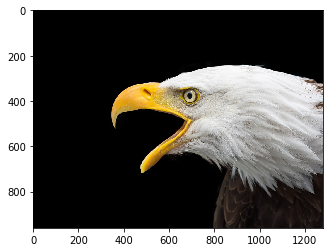

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
 
!wget -nv https://cdn.pixabay.com/photo/2017/09/04/20/52/bald-eagle-2715461_1280.jpg -O eagle.png
img = Image.open('./eagle.png')
plt.imshow(img); plt.show()

In [0]:
import torchvision.transforms as T
trf = T.Compose([T.Resize(256),T.CenterCrop(224),T.ToTensor(),T.Normalize(mean = [0.485, 0.456, 0.406],std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)
out = dlab(inp)['out']
print (out.shape)

torch.Size([1, 21, 224, 224])


In [0]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)

(224, 224)


In [0]:
def decode_segmap(image, nc=21):
   
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
 
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)

   
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
     
  rgb = np.stack([r, g, b], axis=2)
  return rgb

In [0]:
def segment(net, path):
  img = Image.open(path)
  plt.imshow(img); plt.axis('off'); plt.show()
  trf = T.Compose([T.Resize(300),T.ToTensor(),T.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()

2019-07-28 14:20:48 URL:https://www.eagles.org/wp-content/uploads/2015/01/post21.jpg [60969/60969] -> "eagle1.png" [1]
2019-07-28 14:20:50 URL:https://images.squarespace-cdn.com/content/v1/5c4d7e227e3c3a6ec70a5ac7/1562189774324-KMXPX99Q9D3G6MDOXWHE/ke17ZwdGBToddI8pDm48kLVeRugs1MEPOyVIGMv7VkAUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8GRo6ASst2s6pLvNAu_PZdJOX8AtFkTRSQSF4gXjSOXycczJKn6rL6Nn8Q1JL-FhNvlrd21wprmS-Os_JDdm_l4/Tobias+Menzies%2C+2018-05-01+%286+of+6%29.jpg?format=500w [74548/74548] -> "human.png" [1]
2019-07-28 14:20:51 URL:https://heritagechristianservices.org/img/bg-services.jpg [118964/118964] -> "humangroup.png" [1]
2019-07-28 14:20:54 URL:https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/401_Gridlock.jpg/300px-401_Gridlock.jpg [20891/20891] -> "carsroad.png" [1]


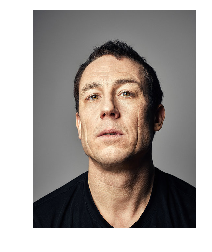

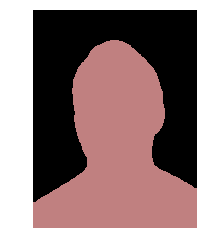

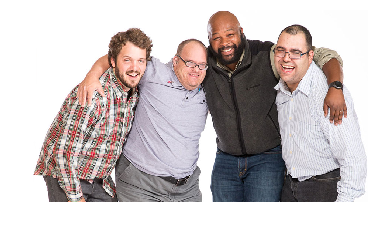

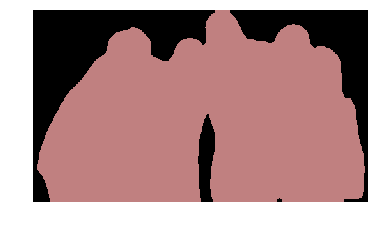

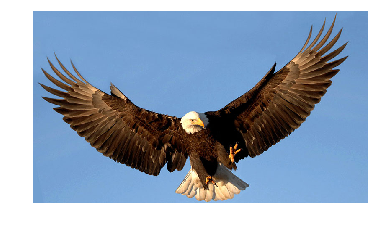

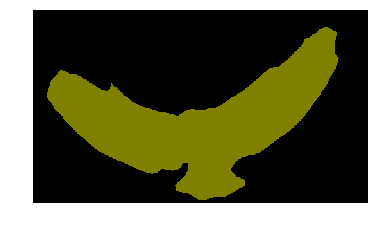

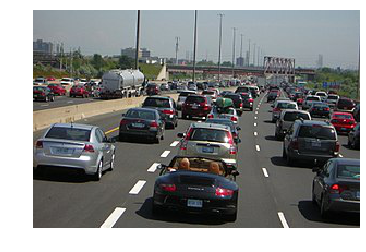

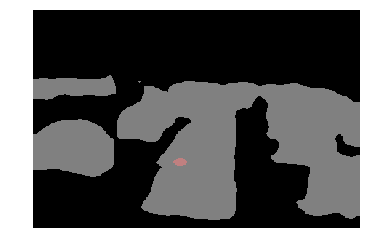

In [0]:
!wget -nv https://www.eagles.org/wp-content/uploads/2015/01/post21.jpg  -O eagle1.png
!wget -nv https://images.squarespace-cdn.com/content/v1/5c4d7e227e3c3a6ec70a5ac7/1562189774324-KMXPX99Q9D3G6MDOXWHE/ke17ZwdGBToddI8pDm48kLVeRugs1MEPOyVIGMv7VkAUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8GRo6ASst2s6pLvNAu_PZdJOX8AtFkTRSQSF4gXjSOXycczJKn6rL6Nn8Q1JL-FhNvlrd21wprmS-Os_JDdm_l4/Tobias+Menzies%2C+2018-05-01+%286+of+6%29.jpg?format=500w -O human.png
!wget -nv https://heritagechristianservices.org/img/bg-services.jpg -O humangroup.png
!wget -nv https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/401_Gridlock.jpg/300px-401_Gridlock.jpg -O carsroad.png
segment(dlab, './human.png')
segment(dlab , './humangroup.png')
segment(dlab , './eagle1.png')
segment(dlab , './carsroad.png')